# MALICIOUS URL DETECTION

## Importing libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Importing the dataset

In [44]:
data = pd.read_csv("data.csv")

# Labels
y = data["label"]

# Features
url_list = data["url"]

print(data.head())

                      url label
0  diaryofagameaddict.com   bad
1        espdesign.com.au   bad
2      iamagameaddict.com   bad
3           kalantzis.net   bad
4   slightlyoffcenter.net   bad


## Feature Scaling

In [ ]:
# Using Tokenizer
vectorizer = TfidfVectorizer()

# Store vectors into X variable as  XFeatures
X = vectorizer.fit_transform(url_list)
#print(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
# Split into training and testing dataset 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)

In [18]:
print(y_train)

226702    good
370689    good
304005    good
235092    good
293973    good
          ... 
259178    good
365838    good
131932    good
146867    good
121958    good
Name: label, Length: 336371, dtype: object


## Training the Logistic Regression model on the Training set

In [39]:
# Model Building using logistic regression

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results & Making the Confusion Matrix

In [40]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score 

#Confusion Matrix of the Model

print("Confusion Matrix of the model is: ",confusion_matrix(y_test, y_pred))

# Accuracy of the Model

print("Accuracy of our model is: ",accuracy_score(y_test, y_pred))

Confusion Matrix of the model is:  [[12367  2597]
 [  377 68752]]
Accuracy of our model is:  0.9646343928745555


## Visualising the Training set results

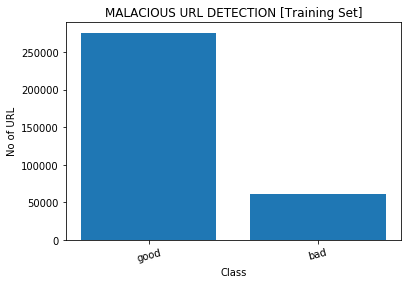

In [41]:
label=["good","bad"]
index_y = np.arange(len(label))
#sample=np.arange(len(y_train))
index_X=[0,0]
for i in y_train:
    if(i=='good'):
        index_X[0] = index_X[0]+1
    else:
        index_X[1] = index_X[1]+1
#print(sample)
#print(index_y)
#print(index_X)
plt.bar(index_y, index_X)
plt.xlabel('Class', fontsize=10)
plt.ylabel('No of URL', fontsize=10)
plt.xticks(index_y, label, fontsize=10, rotation=15)
plt.title('MALACIOUS URL DETECTION [Training Set]')
plt.show()

## Visualising the Test set results

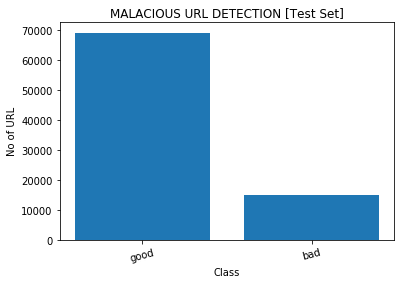

In [42]:
label=["good","bad"]
index_y = np.arange(len(label))
sample=np.arange(len(y_test))
index_X=[0,0]
for i in y_test:
    if(i=='good'):
        index_X[0] = index_X[0]+1
    else:
        index_X[1] = index_X[1]+1
#print(sample)
#print(index_y)
#print(index_X)
plt.bar(index_y, index_X)
plt.xlabel('Class', fontsize=10)
plt.ylabel('No of URL', fontsize=10)
plt.xticks(index_y, label, fontsize=10, rotation=15)
plt.title('MALACIOUS URL DETECTION [Test Set]')
plt.show()